In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/train.csv')

In [ ]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4007,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4008,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4009,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data) #shuffle before splitting into dev and training sets
data.shape
data

array([[5., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       ...,
       [3., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_dev=data[:1000]
Y_dev=data_dev[0:1]
X_dev=data_dev[1:n]
X_dev = X_dev / 255
data_train=data[1000:m].T
Y_train=data_train[0:1]
X_train=data_train[1:n]
X_train=X_train/255

In [ ]:
Y_dev.shape

(1, 785)

In [ ]:
Y_train.shape

(1, 3011)

In [ ]:
X_train.shape

(784, 3011)

In [ ]:
def initial_parameters():
  Weight_1=np.random.rand(10,784)-0.5
  bias_1= np.random.rand(10,1)-0.5
  Weight_2=np.random.rand(10,10)-0.5
  bias_2=np.random.rand(10,1)-0.5
  return Weight_1,bias_1,Weight_2,bias_2

In [ ]:
def activation1(Z):#sigmoid function
  return 1/(1+np.exp(-Z))
def activation2(Z):#relu function
  return np.maximum(Z,0)
def activation3(Z):#tanh function
  return np.exp(Z)-np.exp(-Z)/np.exp(Z)+np.exp(-Z)  
def activation_FL(Z):#softmax function
  return np.exp(Z)/np.sum(Z)


In [ ]:
def forward_propogation(Weight_1,bias_1,Weight_2,bias_2,X):
  Z1=np.dot(Weight_1,X)+bias_1
  A1=activation2(Z1)
  Z2=np.dot(Weight_2,A1)+bias_2
  A2=activation_FL(Z2)
  return Z1,A1,Z2,A2

In [ ]:
def activation2_deriv(Z):
  return Z>0
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [ ]:
def backward_prop(Z1,A1,Z2,A2,Weight_1,Weight_2,X,Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dZ_2=A2-one_hot_Y
  dW_2=1/m*(np.dot(dZ_2,(A1.T)))
  db_2=np.sum(1/m*(dZ_2))
  dZ_1=np.dot(Weight_2,dZ_2)*activation2_deriv(Z1)
  dW_1=1/m*(np.dot(dZ_1,(X.T)))
  db_1=np.sum(1/m*(dZ_1))
  return dW_1,db_1,dW_2,db_2

In [ ]:
def update_parameters(Weight_1, bias_1, Weight_2, bias_2, dW_1, db_1, dW_2, db_2, alpha):
  Weight_1=Weight_1-alpha*dW_1
  bias_1=bias_1-alpha*db_1
  Weight_2=Weight_2-alpha*dW_2
  bias_2=bias_2-alpha*db_2
  return Weight_1,bias_1,Weight_2,bias_2

In [ ]:
def get_prediction(A2):
  return np.argmax(A2,0)
def get_accuracy(predictions,Y):
  print(predictions,Y)
  return np.sum(predictions==Y)/Y.size 
def gradient_descent(X,Y,alpha,iterations):
  Weight_1,bias_1,Weight_2,bias_2=initial_parameters()
  for i in range(iterations):
    Z1,A1,Z2,A2=forward_propogation(Weight_1,bias_1,Weight_2,bias_2,X)
    dW_1,db_1,dW_2,db_2= backward_prop(Z1,A1,Z2,A2,Weight_1,Weight_2,X,Y)
    Weight_1,bias_1,Weight_2,bias_2=update_parameters(Weight_1, bias_1, Weight_2, bias_2, dW_1, db_1, dW_2, db_2, alpha)
    if i % 10 == 0:
      print("Iteration: ", i)
      predictions = get_prediction(A2)
      print(get_accuracy(predictions, Y))
  return Weight_1,bias_1,Weight_2,bias_2   

In [ ]:
Weight_1,bias_1,Weight_2,bias_2=gradient_descent(X_train, Y_train, 0.10, 500)   

TypeError: ignored

In [ ]:
Y_train.max()

9

In [ ]:
Y_train.size

18999

In [ ]:
Y_train=Y_train.reshape(18999,1)

In [ ]:
import matplotlib.pyplot as plt

def make_perdiction(X,Weight_1,bias_1,Weight_2,bias_2):
  _,_,_,A2=forward_propogation(Weight_1,bias_1,Weight_2,bias_2,X)
  predictions=get_prediction(A2)
  return predictions
def test_prediction(index,Weight_1,bias_1,Weight_2,bias_2):
  current_image=X_train[:,index,None]
  prediction=make_perdiction(X_train[:,index,None],Weight_1,bias_1,Weight_2,bias_2)
  label=Y_train[index]
  print('prediction: ',prediction)
  print('label: ',label)
  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()  


prediction:  [2]
label:  [2]


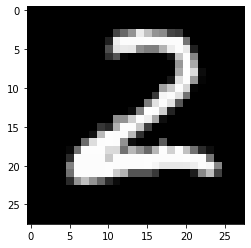

In [ ]:
test_prediction(69,Weight_1,bias_1,Weight_2,bias_2)
